In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [8]:
def plot_history(log_path="experiments/exp_0", add_title=False):
    _, ax = plt.subplots()
    df_history = pd.read_csv(f"{log_path}/ga_history.csv")
    df_history['cumulative_average'] = df_history['best_cost'].expanding().mean()
    ax.plot(df_history['generation'], df_history['cumulative_average'], label='Cumulative Average of Best Cost')
    ax.plot(df_history['generation']-1, df_history['best_cost'], label='Best Cost per Generation', zorder=5)

    df_evaluations = pd.read_csv(f"{log_path}/ga_evaluations.csv")
    ax.scatter(df_evaluations['generation'], df_evaluations['evaluation_cost'], color='red', alpha=0.2, s=2, label='Offspring Evaluation')

    if add_title:
        json_path = f"{log_path}/ga_params.json"
        with open(json_path, "r") as f:
            params = json.load(f)
        improvement_over_baseline = 1 - (df_history['best_cost'].min() / params["baseline_cost"])
        title = f"n={params['problem_size']}, alpha={params['problem_alpha']}, beta={params['problem_beta']}, density={params['problem_density']:.1f}, i={improvement_over_baseline:.2f}"
        ax.set_title(title)

    ax.set_xlabel('Generation')
    ax.set_ylabel('Cost')
    ax.legend()
    plt.show()
    return ax

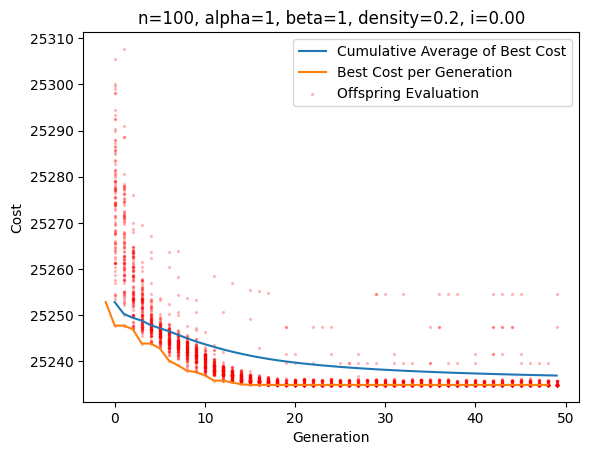

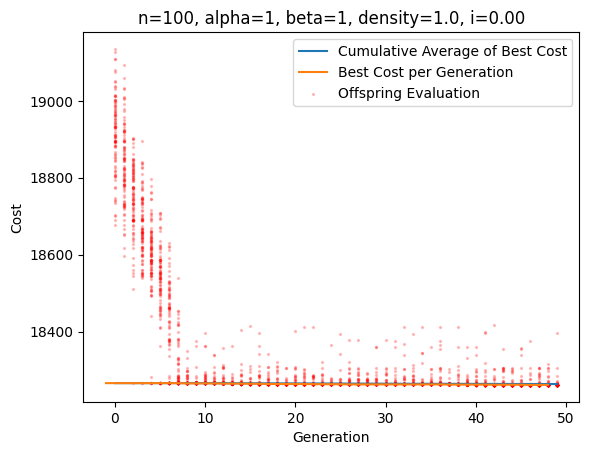

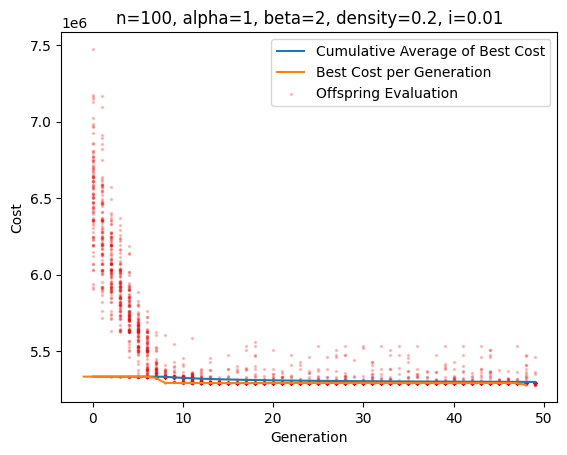

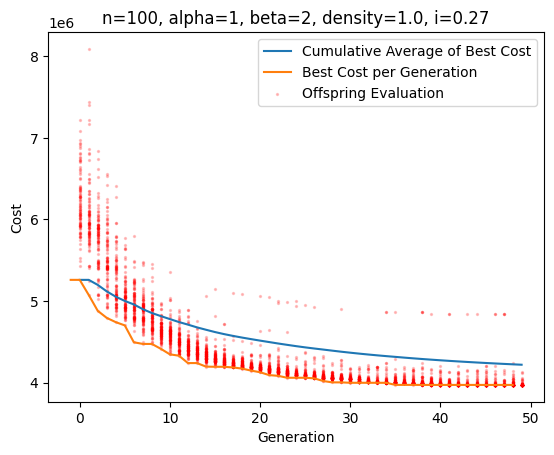

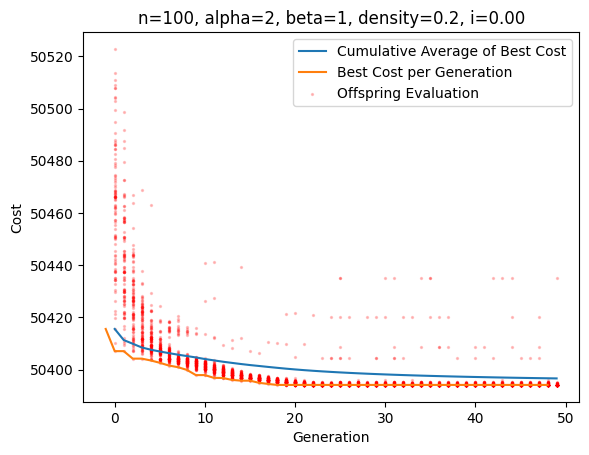

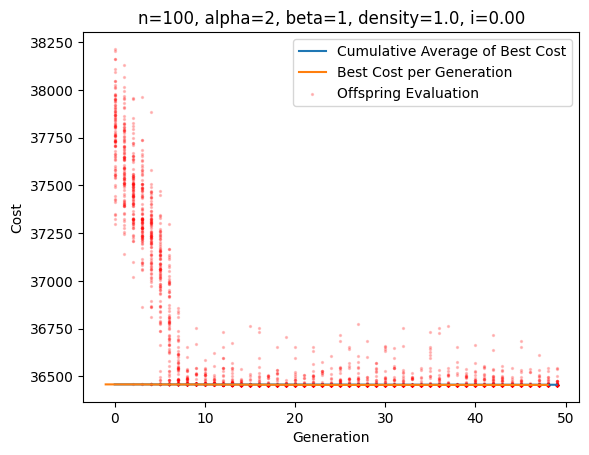

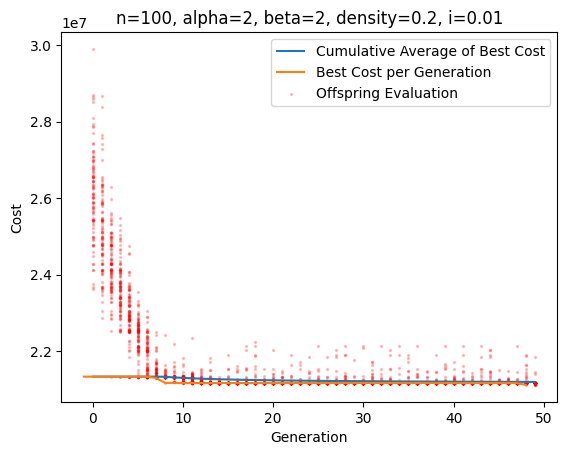

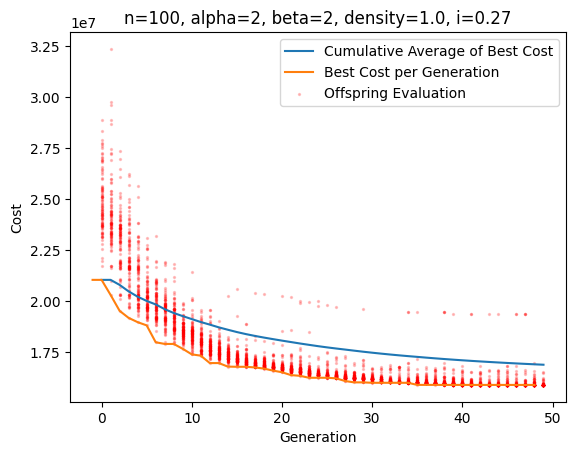

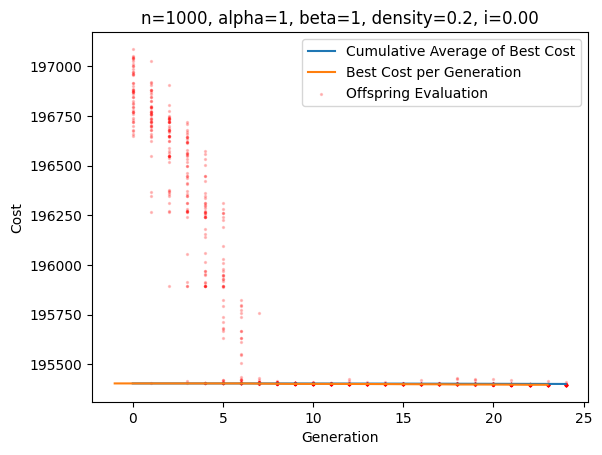

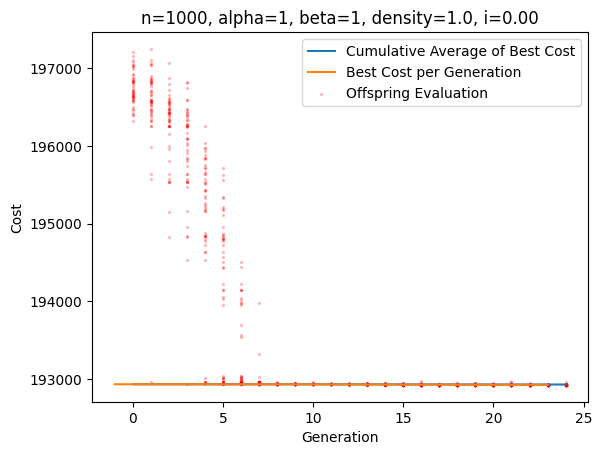

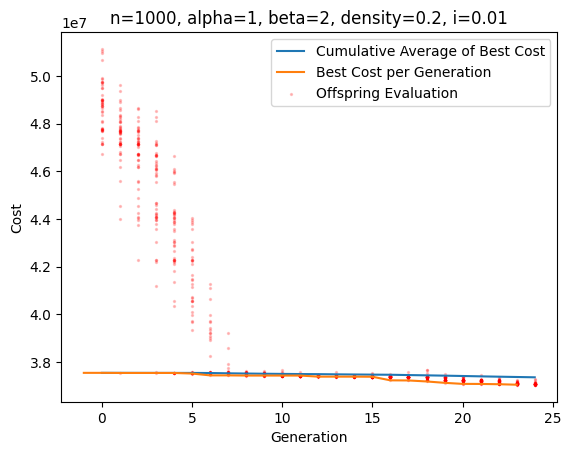

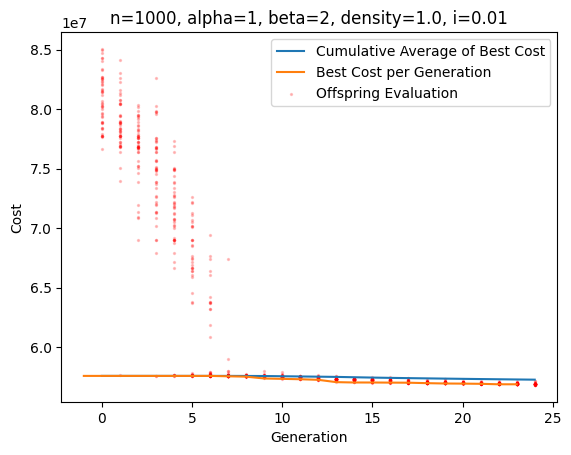

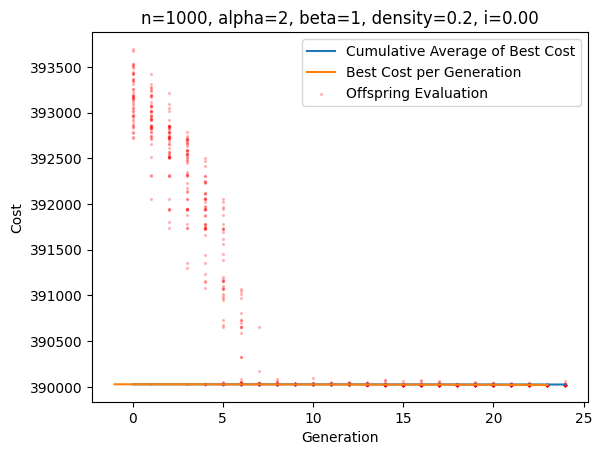

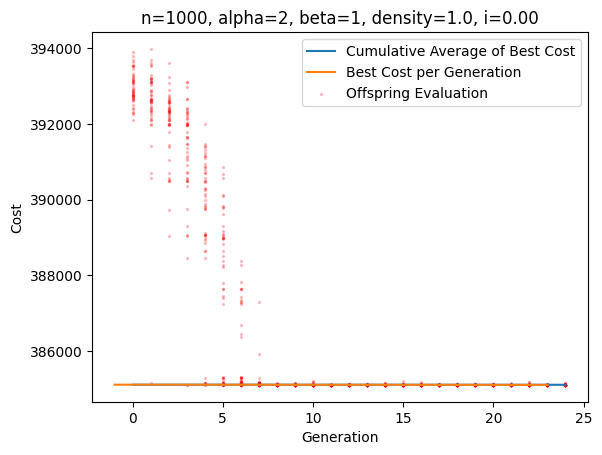

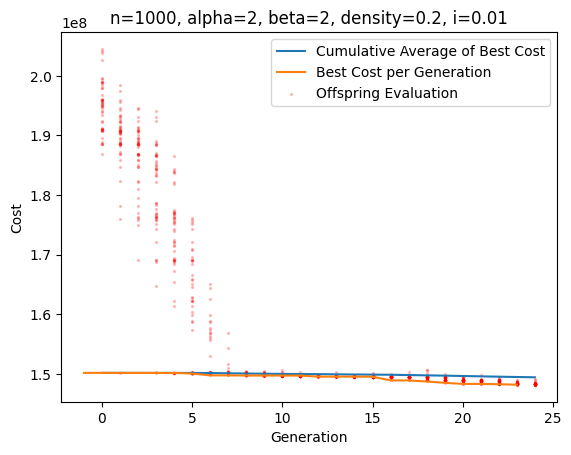

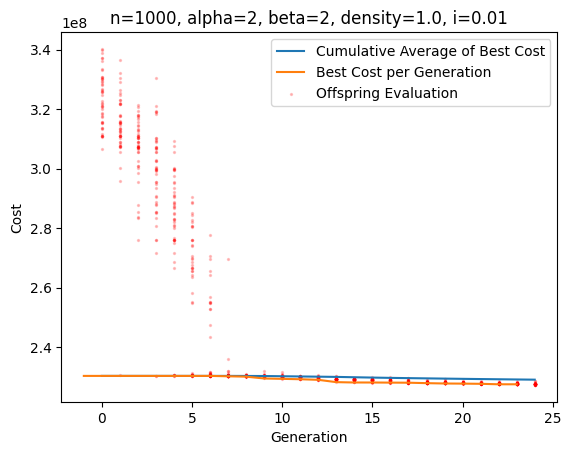

In [9]:
for i in range(16):
    log_dir = f"experiments/exp_{i}"
    ax = plot_history(log_path=log_dir, add_title=True)

In [10]:
data = []
for i in range(16):
    log_dir = f"experiments/exp_{i}"
    with open(f"{log_dir}/ga_params.json", "r") as f:
        params = json.load(f)
    df_history = pd.read_csv(f"{log_dir}/ga_history.csv")
    best_cost = df_history['best_cost'].min()
    params['best_cost'] = best_cost
    sol = np.load(f"{log_dir}/best_sol.npy")
    baseline = np.arange(1, len(sol)+1)
    overlap = np.sum(sol == baseline)/len(sol)
    params['overlap'] = overlap
    data.append(params)
df = pd.DataFrame(data)
df["improvement"] = 1 - (df["best_cost"] / df["baseline_cost"])
problem_features = ["problem_size", "problem_alpha", "problem_beta", "problem_density"]
others = ["population_size", "max_generations", "mutation_rate", "mutation_choice"]
df = df[problem_features + others + ["baseline_cost", "best_cost", "improvement", "overlap"]]


In [11]:
sol = np.load(f"experiments/exp_4/best_sol.npy")#!= np.arange(1, 100)
base =  np.arange(1, 100)
sol[sol != base]
np.unique(sol[sol != base], return_counts=True)

(array([ 2,  5,  6, 12, 14, 15, 19, 21, 23, 24, 29, 30, 34, 35, 44, 61, 68,
        69, 75, 80, 81, 83, 84, 87, 88, 94, 97]),
 array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2,
        1, 2, 2, 1, 1]))

In [12]:
df.rename(columns={
    "max_generations": "$n_g$",
    "mutation_rate": "$p_m$",
    "mutation_choice": "$p_s$",
    "problem_size": "$n$",
    "population_size": "$n_p$",
    "problem_alpha": "$\\alpha$",
    "problem_beta": "$\\beta$",
    "problem_density": "$\\rho$",
    "baseline_cost": "cost (baseline)",
    "best_cost": "cost (GA)",
    "overlap": "overlap",
    "improvement": "improvement"
}, inplace=True)
table = df.to_latex(float_format="%.2f", index=False)
print(table)

\begin{tabular}{rrrrrrrrrrrr}
\toprule
$n$ & $\alpha$ & $\beta$ & $\rho$ & $n_p$ & $n_g$ & $p_m$ & $p_s$ & cost (baseline) & cost (GA) & improvement & overlap \\
\midrule
100 & 1 & 1 & 0.22 & 100 & 50 & 0.50 & 0.50 & 25266.41 & 25234.88 & 0.00 & 0.63 \\
100 & 1 & 1 & 1.00 & 100 & 50 & 0.50 & 0.50 & 18266.19 & 18261.53 & 0.00 & 0.90 \\
100 & 1 & 2 & 0.22 & 100 & 50 & 0.50 & 0.50 & 5334401.93 & 5280242.36 & 0.01 & 0.98 \\
100 & 1 & 2 & 1.00 & 100 & 50 & 0.50 & 0.50 & 5404978.09 & 3971240.29 & 0.27 & 0.67 \\
100 & 2 & 1 & 0.22 & 100 & 50 & 0.50 & 0.50 & 50425.31 & 50394.11 & 0.00 & 0.64 \\
100 & 2 & 1 & 1.00 & 100 & 50 & 0.50 & 0.50 & 36457.92 & 36455.14 & 0.00 & 0.92 \\
100 & 2 & 2 & 0.22 & 100 & 50 & 0.50 & 0.50 & 21337285.20 & 21120649.64 & 0.01 & 0.98 \\
100 & 2 & 2 & 1.00 & 100 & 50 & 0.50 & 0.50 & 21619689.00 & 15884779.48 & 0.27 & 0.67 \\
1000 & 1 & 1 & 0.20 & 50 & 25 & 0.50 & 0.50 & 195402.96 & 195396.09 & 0.00 & 0.99 \\
1000 & 1 & 1 & 1.00 & 50 & 25 & 0.50 & 0.50 & 192936.23 & 19